Para la prectica se realiza una prueba de un pequeño set de imagenes y ver como se nota la imGEN real VS el descriptor desarrollado como punto de partida para el entrenamiento del SMV

In [69]:
import os
import cv2
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import exposure

In [70]:
# Función para cargar una muestra de las imágenes
def cargar_muestra_imagenes(carpeta, tamano_muestra=5):
    imagenes = []
    for i, archivo in enumerate(os.listdir(carpeta)):
        if i >= tamano_muestra:
            break
        img = cv2.imread(os.path.join(carpeta, archivo), cv2.IMREAD_GRAYSCALE)
        if img is not None:
            imagenes.append(img)
    return imagenes

In [71]:
# Función para visualizar características HOG de una imagen
def visualizar_hog(imagen):

    caracteristicas, imagen_hog = hog(imagen, 
                                      orientations=9, 
                                      pixels_per_cell=(8, 8),
                                      cells_per_block=(1, 1), 
                                      transform_sqrt= False,
                                      visualize=True,
                                     feature_vector = False)
    
    #El cambio mas significativo es el cambio de los parametros del metodo HOG para extraer los gradientes.
    # caracteristicas, imagen_hog = hog(imagen, 
    #                             orientations = 11,
    #                             pixels_per_cell = (16,16),
    #                             cells_per_block = (1, 1), 
    #                             transform_sqrt= False,
    #                             visualize=True,
    #                             feature_vector = False)
    
    imagen_hog_ajustada = exposure.rescale_intensity(imagen_hog, in_range=(0, 10))

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)

    ax1.axis('off')
    ax1.imshow(imagen, cmap=plt.cm.gray)
    ax1.set_title('Imagen Original')

    ax2.axis('off')
    ax2.imshow(imagen_hog_ajustada, cmap=plt.cm.gray)
    ax2.set_title('Imagen HOG')

    plt.show()

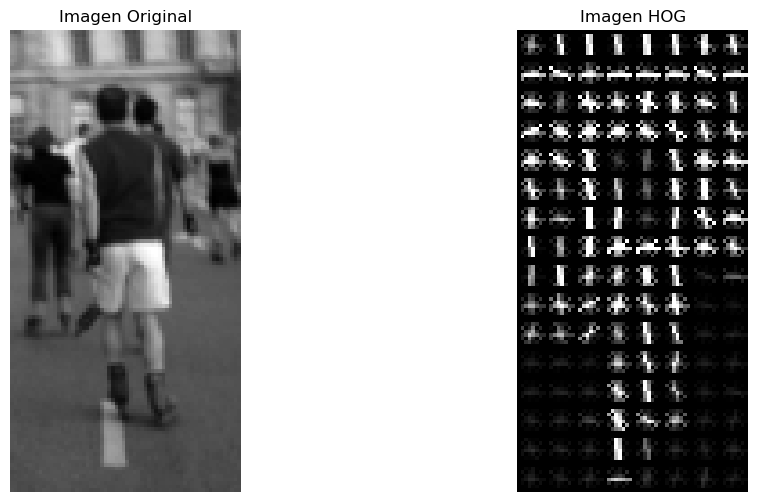

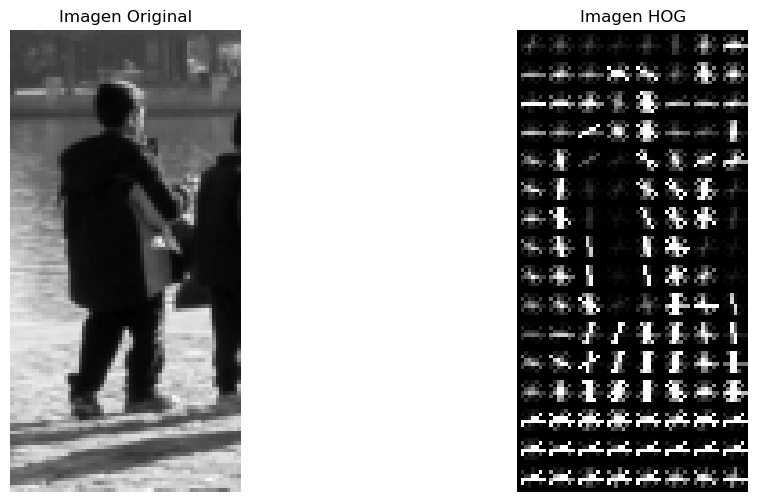

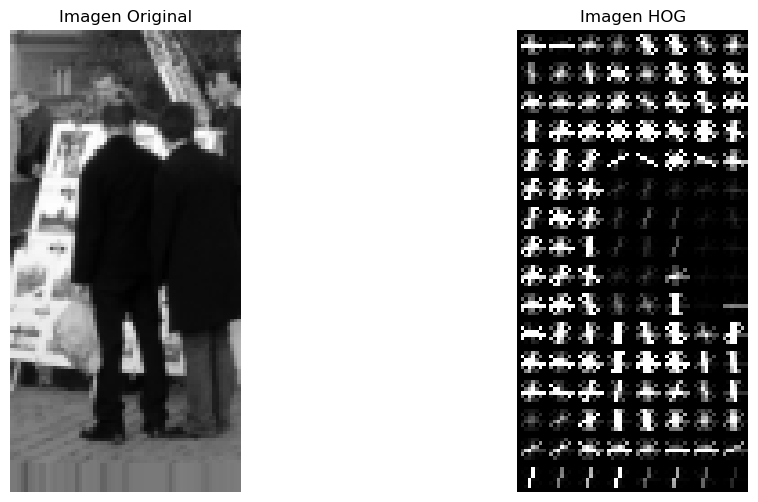

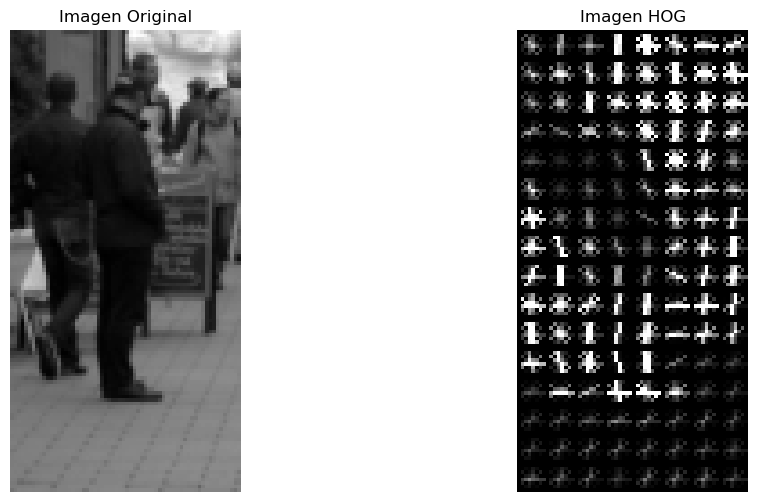

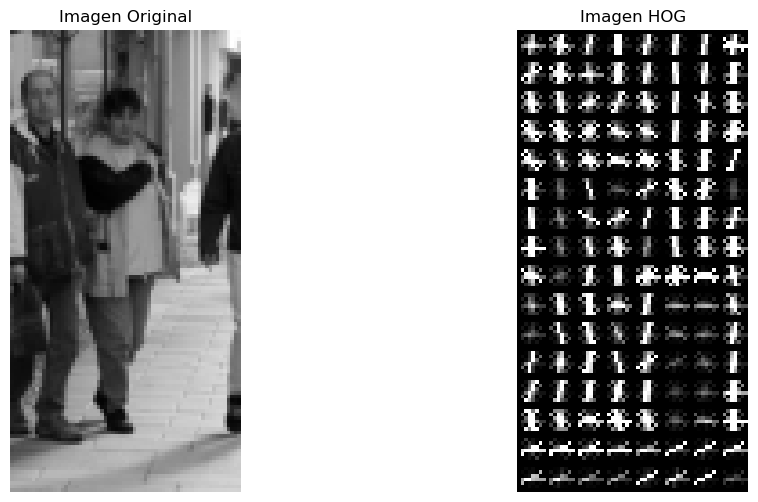

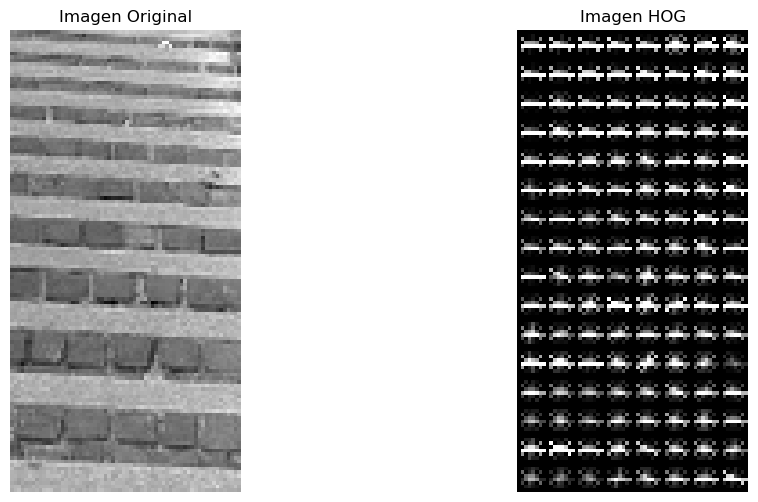

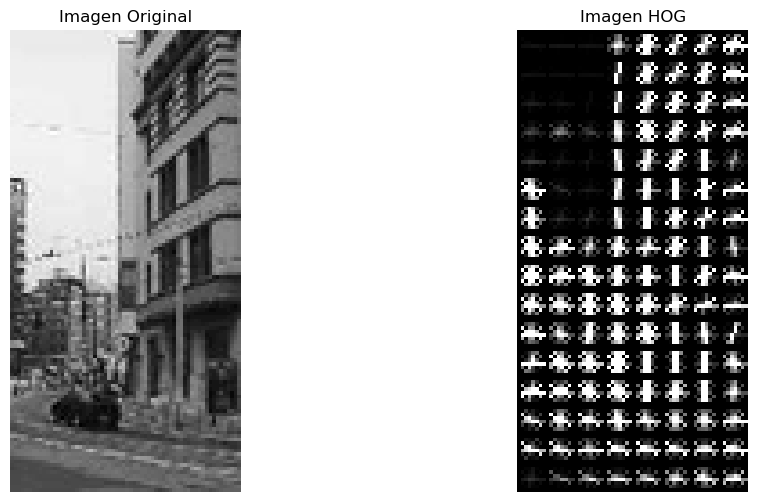

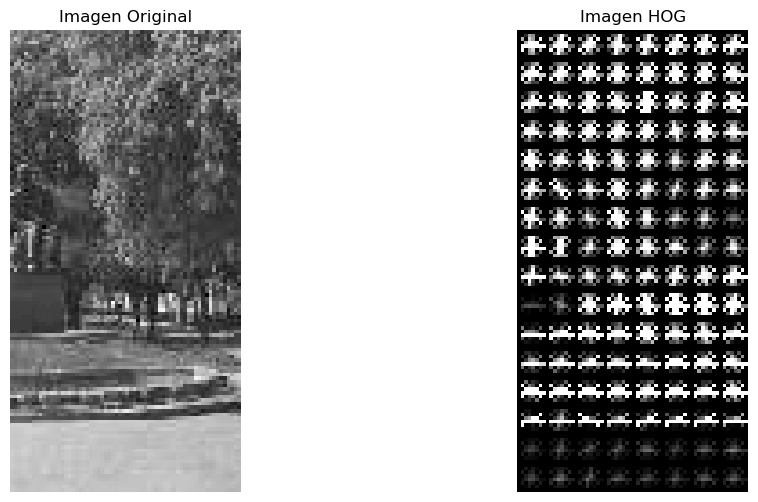

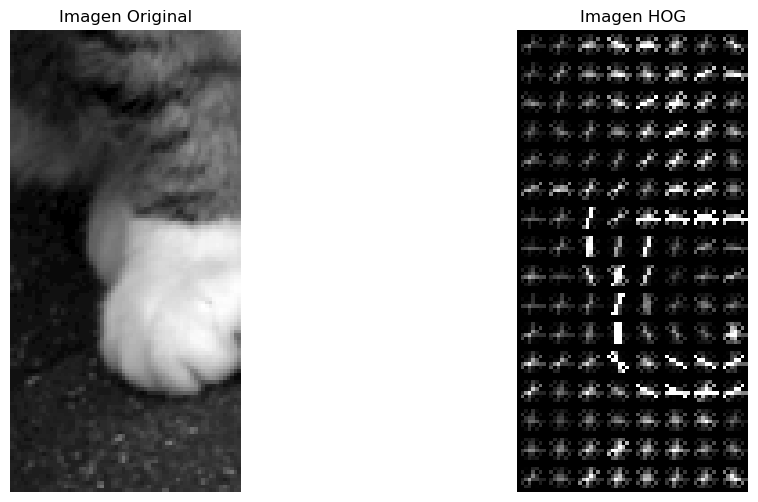

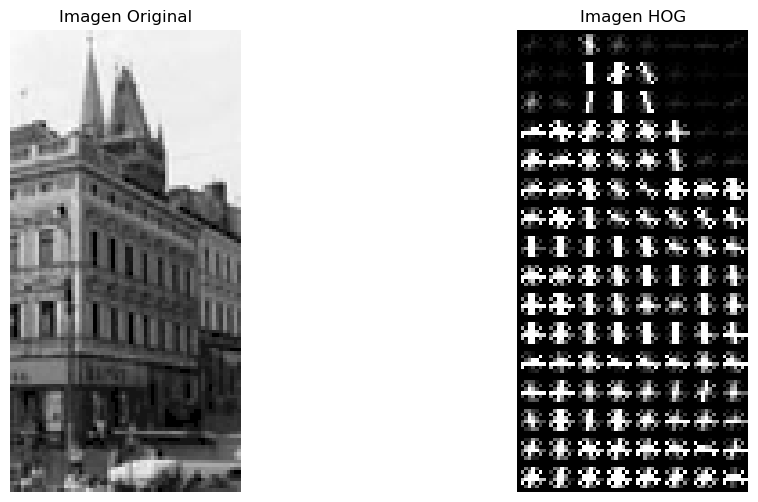

In [72]:
# Rutas a los directorios
#base_dir = '/content/drive/MyDrive/Navegacion_autonoma/ECI-DATCOM-UGR_Deteccion_peatones-master/data'
base_dir = './data/'
dir_entrenamiento_peatones = os.path.join(base_dir, 'train/pedestrians')
dir_entrenamiento_fondo = os.path.join(base_dir, 'train/background')

# Cargar una muestra de imágenes de entrenamiento (peatones y fondo)
tamano_muestra = 5
muestra_peatones = cargar_muestra_imagenes(dir_entrenamiento_peatones, tamano_muestra)
muestra_fondo = cargar_muestra_imagenes(dir_entrenamiento_fondo, tamano_muestra)

# Visualizar características HOG de las imágenes de la muestra
for imagen in muestra_peatones + muestra_fondo:
    visualizar_hog(imagen)
